In [6]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
methods = {'No_Deconv':('-.o', 2), 
           'FPFS':('--^', 2),
           'Richard-Lucy(10)':('-D', 1.2), 'Richard-Lucy(20)':('-D', 2), 
           'Richard-Lucy(30)':('-D', 2.7), 'Richard-Lucy(50)':('-D', 3.3), 
          #  'Richard-Lucy(100):'--D',
           'Unrolled_ADMM(1)':('-*', 1.2), 'Unrolled_ADMM(2)':('-*', 2), 
           'Unrolled_ADMM(4)':('-*', 2.7), 'Unrolled_ADMM(8)':('-*', 3.3)}
shear_errs=[0, 0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
seeing_errs=[0, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]

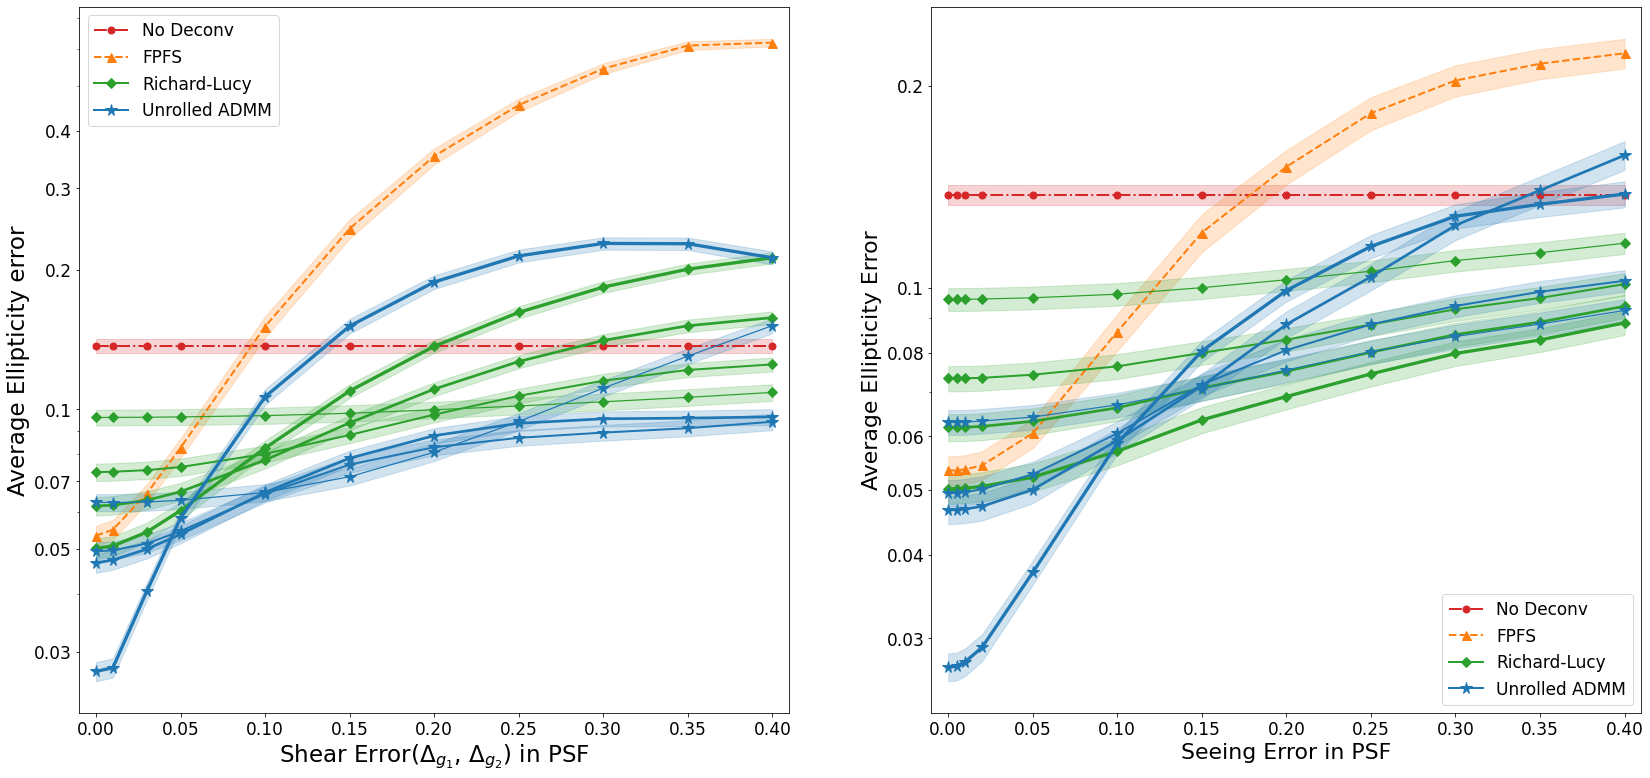

In [8]:
fig = plt.figure(figsize=(28,13), facecolor='white') 

ax1 = plt.subplot(1,2,1)
for method in methods:
    result_path = os.path.join('results', method)
    results_file = os.path.join(result_path, 'results_psf_shear_err.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_Deconv':
        gt_shear = np.array(results['0']['gt_shear'])
        
    g_errs, g_stds = [], []
    for shear_err in shear_errs:
        rec_err = np.abs(np.array(results[str(shear_err)]['rec_shear']) - gt_shear)
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2])/20)
    g_errs, g_stds = np.array(g_errs), np.array(g_stds)
    
    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    markersize = 11.7 if 'ADMM' in method else (6.5 if 'Richard-Lucy' in method else (9 if method == 'FPFS' else 7))
    if methods[method][1] == 2:
        label = 'Unrolled ADMM' if 'ADMM' in method else ('Richard-Lucy' if 'Richard-Lucy' in method else ('No Deconv' if 'No' in method else method))
        ax1.plot(shear_errs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][1], markersize=markersize)
    else:
        ax1.plot(shear_errs, g_errs, methods[method][0], color=color, linewidth=methods[method][1], markersize=markersize)
    ax1.fill_between(shear_errs, g_errs-g_stds,g_errs+g_stds,color=color,alpha=.2)
    
ax1.set_xlim([-0.01, 0.41])
ax1.set_xlabel('Shear Error($\Delta_{g_1}$, $\Delta_{g_2}$) in PSF', fontsize=23)
ax1.set_yscale('log')
ax1.set_yticks([0.03,0.05,0.07,0.1,0.2,0.3,0.4])
ax1.set_yticklabels(['0.03','0.05','0.07','0.1','0.2','0.3','0.4'])
ax1.set_ylabel('Average Ellipticity error', fontsize=23)
plt.legend(fontsize=17)
plt.tick_params(labelsize=17)


ax1 = plt.subplot(1,2,2)
for method in methods:
    result_path = os.path.join('results', method)
    results_file = os.path.join(result_path, 'results_psf_seeing_err.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_Deconv':
        gt_shear = np.array(results['0']['gt_shear'])
        
    g_errs, g_stds = [], []
    for seeing_err in seeing_errs:
        rec_err = np.abs(np.array(results[str(seeing_err)]['rec_shear']) - gt_shear)
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2])/20)
    g_errs, g_stds = np.array(g_errs), np.array(g_stds)

    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    markersize = 11.7 if 'ADMM' in method else (6.5 if 'Richard-Lucy' in method else (9 if method == 'FPFS' else 7))
    if methods[method][1] == 2:
        label = 'Unrolled ADMM' if 'ADMM' in method else ('Richard-Lucy' if 'Richard-Lucy' in method else ('No Deconv' if 'No' in method else method))
        ax1.plot(seeing_errs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][1], markersize=markersize)
    else:
        ax1.plot(seeing_errs, g_errs, methods[method][0], color=color, linewidth=methods[method][1], markersize=markersize)
    ax1.fill_between(seeing_errs, g_errs-g_stds,g_errs+g_stds,color=color,alpha=.2)

ax1.set_xlim([-0.01, 0.41])
ax1.set_xlabel('Seeing Error in PSF', fontsize=22)
ax1.set_yscale('log')
ax1.set_yticks([0.03,0.04,0.05,0.06,0.08,0.1,0.2])
ax1.set_yticklabels(['0.03','0.04','0.05','0.06','0.08','0.1','0.2'])
ax1.set_ylabel('Average Ellipticity Error', fontsize=22)
plt.legend(fontsize=17, loc='lower right')
plt.tick_params(labelsize=17) 

plt.savefig(os.path.join('figures', 'psf_err.jpg'), bbox_inches='tight')

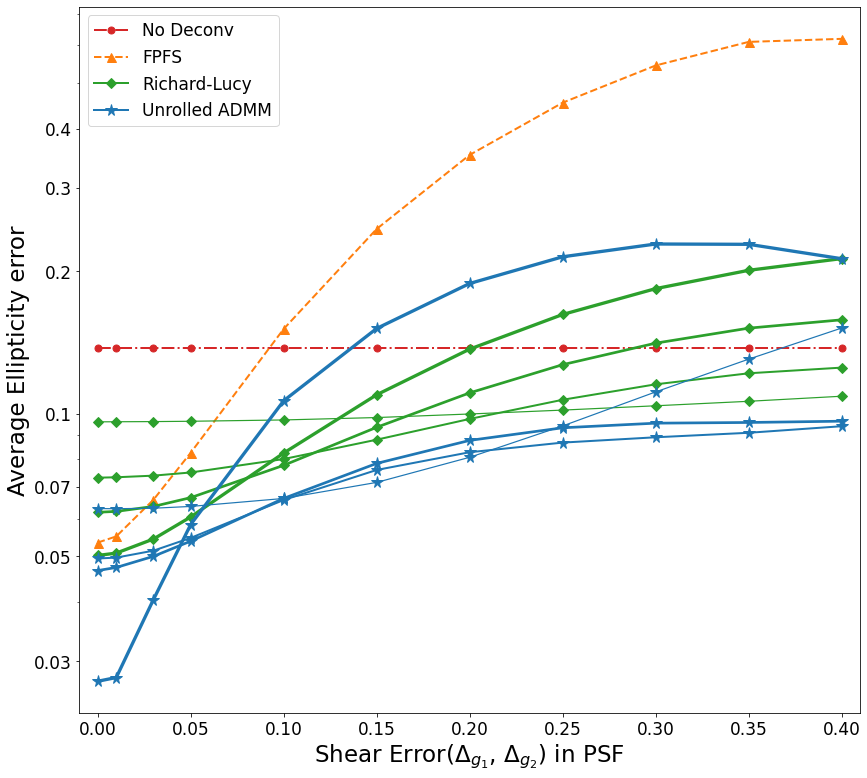

In [9]:
fig, ax1 = plt.subplots(figsize=(14,13), facecolor='white')

for method in methods:
    result_path = os.path.join('results', method)
    results_file = os.path.join(result_path, 'results_psf_shear_err.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_Deconv':
        gt_shear = np.array(results['0']['gt_shear'])
        
    g_errs, g_stds = [], []
    for shear_err in shear_errs:
        rec_err = np.abs(np.array(results[str(shear_err)]['rec_shear']) - gt_shear)
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2])/20)
    g_errs = np.array(g_errs)
    
    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    markersize = 11.7 if 'ADMM' in method else (6.5 if 'Richard-Lucy' in method else (9 if method == 'FPFS' else 7))
    if methods[method][1] == 2:
        label = 'Unrolled ADMM' if 'ADMM' in method else ('Richard-Lucy' if 'Richard-Lucy' in method else ('No Deconv' if 'No' in method else method))
        ax1.plot(shear_errs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][1], markersize=markersize)
    else:
        ax1.plot(shear_errs, g_errs, methods[method][0], color=color, linewidth=methods[method][1], markersize=markersize)
    
ax1.set_xlim([-0.01, 0.41])
ax1.set_xlabel('Shear Error($\Delta_{g_1}$, $\Delta_{g_2}$) in PSF', fontsize=23)

ax1.set_yscale('log')
ax1.set_yticks([0.03,0.05,0.07,0.1,0.2,0.3,0.4])
ax1.set_yticklabels(['0.03','0.05','0.07','0.1','0.2','0.3','0.4'])
ax1.set_ylabel('Average Ellipticity error', fontsize=23)

plt.legend(fontsize=17)
plt.tick_params(labelsize=17)
plt.savefig(os.path.join('figures', 'psf_shear_err.jpg'), bbox_inches='tight')

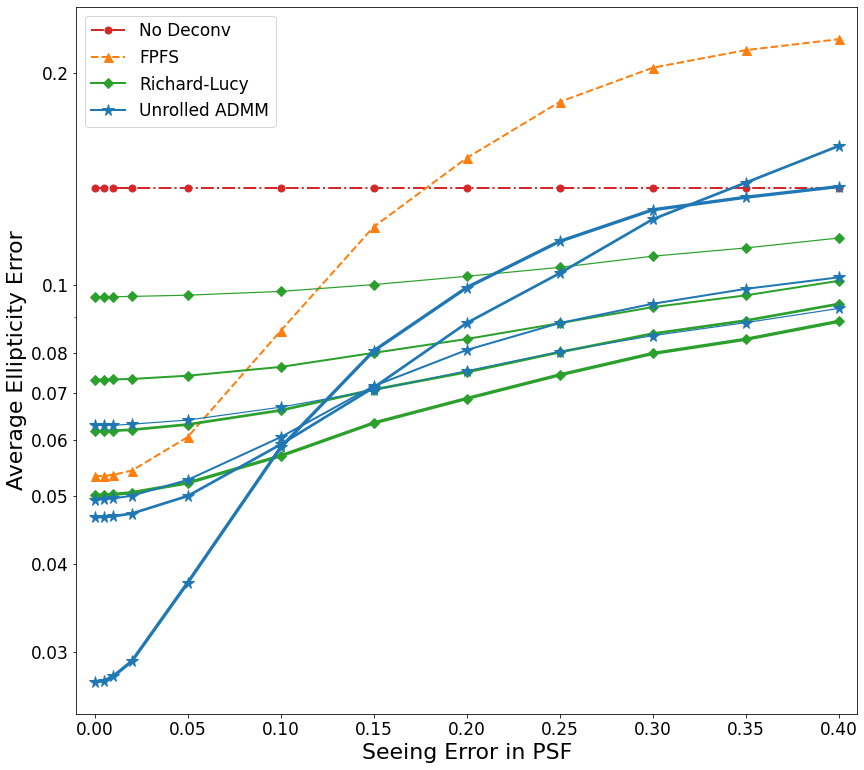

In [10]:
fig, ax1 = plt.subplots(figsize=(14,13))

for method in methods:
    result_path = os.path.join('results', method)
    results_file = os.path.join(result_path, 'results_psf_seeing_err.json')
    with open(results_file, 'r') as f:
        results = json.load(f)
    if method == 'No_Deconv':
        gt_shear = np.array(results['0']['gt_shear'])
        
    g_errs, g_stds = [], []
    for seeing_err in seeing_errs:
        rec_err = np.abs(np.array(results[str(seeing_err)]['rec_shear']) - gt_shear)
        g_errs.append(np.mean(rec_err[:,2]))
        g_stds.append(np.std(rec_err[:,2]))

    color = 'tab:blue' if 'ADMM' in method else ('tab:green' if 'Richard-Lucy' in method else ('tab:orange' if method=='FPFS' else 'tab:red'))
    markersize = 11.7 if 'ADMM' in method else (6.5 if 'Richard-Lucy' in method else (9 if method == 'FPFS' else 7))
    if methods[method][1] == 2:
        label = 'Unrolled ADMM' if 'ADMM' in method else ('Richard-Lucy' if 'Richard-Lucy' in method else ('No Deconv' if 'No' in method else method))
        ax1.plot(seeing_errs, g_errs, methods[method][0], label=label, color=color, linewidth=methods[method][1], markersize=markersize)
    else:
        ax1.plot(seeing_errs, g_errs, methods[method][0], color=color, linewidth=methods[method][1], markersize=markersize)

ax1.set_xlim([-0.01, 0.41])
ax1.set_xlabel('Seeing Error in PSF', fontsize=22)

ax1.set_yscale('log')
ax1.set_yticks([0.03,0.04,0.05,0.06,0.07,0.08,0.1,0.2])
ax1.set_yticklabels(['0.03','0.04','0.05','0.06','0.07','0.08','0.1','0.2'])
ax1.set_ylabel('Average Ellipticity Error', fontsize=22)

plt.legend(fontsize=17)
plt.tick_params(labelsize=17)
plt.savefig(os.path.join('figures', 'psf_seeing_err.jpg'), bbox_inches='tight')